In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import files
uploaded = files.upload()


Saving house_price.csv to house_price.csv


In [ ]:
data = pd.read_csv('house_price.csv')
print(data.head())
data = data.dropna()
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)
data = pd.get_dummies(data, drop_first=True)

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    3.0  2850.0       sqft   4200.00           sqft     98119   
1     4    5.0  3040.0       sqft   5002.00           sqft     98106   
2     3    1.0  1290.0       sqft   6048.00           sqft     98125   
3     3    2.0  2360.0       sqft      0.28           acre     98188   
4     3    3.5  1942.0       sqft   1603.00           sqft     98107   

       price  
0  1175000.0  
1  1057500.0  
2   799000.0  
3   565000.0  
4  1187000.0  
Non-numeric columns: Index(['size_units', 'lot_size_units'], dtype='object')


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])





In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1302389194752.0000 - val_loss: 2368925597696.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1245724803072.0000 - val_loss: 2368922976256.0000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1191005257728.0000 - val_loss: 2368917733376.0000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1314142289920.0000 - val_loss: 2368908820480.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1248030097408.0000 - val_loss: 2368894140416.0000
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1294147780608.0000 - val_loss: 2368870285312.0000
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1247653920768.0000 - val_loss: 2368831750144.0000
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1270253092864.0000 - val_loss: 2368773029888.0000
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1208130994176.0000 - val_loss: 2368684687360.0000
Epoch 10/100
9/9 ━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 226859975272.5927


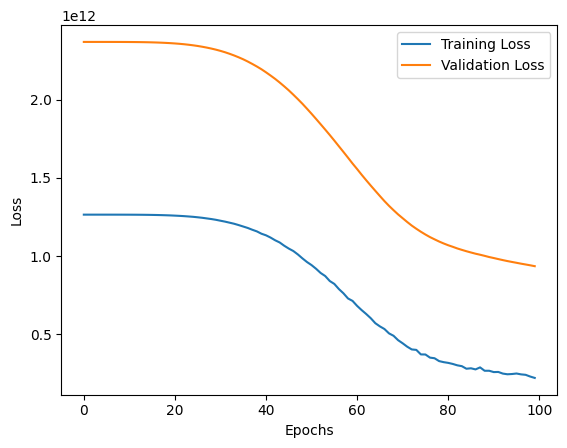

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
